# Neuroevolution
 
 - Gonzalo Pierola
 - Iker García


## Human Player
Run the following if you want to play the game and test It by yourself.<br /> The objective is not to crash against the tubes.<br /> The bird will jump if you push any key. <br />
<br />
Credits: https://youtu.be/h2Uhla6nLDU

In [130]:
import pygame
from pygame.locals import *  # noqa
import sys
import random


class FlappyBird_Human:
    def __init__(self):
        self.screen = pygame.display.set_mode((400, 700))
        self.bird = pygame.Rect(65, 50, 50, 50)
        self.background = pygame.image.load("assets/background.png").convert()
        self.birdSprites = [pygame.image.load("assets/1.png").convert_alpha(),
                            pygame.image.load("assets/2.png").convert_alpha(),
                            pygame.image.load("assets/dead.png")]
        self.wallUp = pygame.image.load("assets/bottom.png").convert_alpha()
        self.wallDown = pygame.image.load("assets/top.png").convert_alpha()
        self.gap = 145
        self.wallx = 400
        self.birdY = 350
        self.jump = 0
        self.jumpSpeed = 15
        self.gravity = 10
        self.dead = False
        self.sprite = 0
        self.counter = 0
        self.offset = random.randint(-200, 200)

    def updateWalls(self):
        self.wallx -= 4
        if self.wallx < -80:
            self.wallx = 400
            self.counter += 1
            self.offset = random.randint(-200, 200)

    def birdUpdate(self):
        if self.jump:
            self.jumpSpeed -= 1
            self.birdY -= self.jumpSpeed
            self.jump -= 1
        else:
            self.birdY += self.gravity
            self.gravity += 0.2
        self.bird[1] = self.birdY
        upRect = pygame.Rect(self.wallx,
                             360 + self.gap - self.offset + 10,
                             self.wallUp.get_width() - 10,
                             self.wallUp.get_height())
        downRect = pygame.Rect(self.wallx,
                               0 - self.gap - self.offset - 10,
                               self.wallDown.get_width() - 10,
                               self.wallDown.get_height())
        if upRect.colliderect(self.bird):
            self.dead = True
        if downRect.colliderect(self.bird):
            self.dead = True
        if not 0 < self.bird[1] < 720:
            self.bird[1] = 50
            self.birdY = 50
            self.dead = False
            self.counter = 0
            self.wallx = 400
            self.offset = random.randint(-110, 110)
            self.gravity = 10

    def run(self):
        clock = pygame.time.Clock()
        pygame.font.init()
        font = pygame.font.SysFont("Arial", 50)
        while True:
            
            clock.tick(60)
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    sys.exit()
                if (event.type == pygame.KEYDOWN or event.type == pygame.MOUSEBUTTONDOWN) and not self.dead:
                    self.jump = 17
                    self.gravity = 10
                    self.jumpSpeed = 15

            self.screen.fill((255, 255, 255))
            self.screen.blit(self.background, (0, 0))
            self.screen.blit(self.wallUp,
                             (self.wallx, 360 + self.gap - self.offset))
            self.screen.blit(self.wallDown,
                             (self.wallx, 0 - self.gap - self.offset))
            self.screen.blit(font.render(str(self.counter),
                                         -1,
                                         (255, 255, 255)),
                             (200, 50))
            if self.dead:
                self.sprite = 2
            elif self.jump:
                self.sprite = 1
            self.screen.blit(self.birdSprites[self.sprite], (70, self.birdY))
            
            if not self.dead:
                self.sprite = 0
            self.updateWalls()
            self.birdUpdate()
            pygame.display.update()

if __name__ == "__main__":
    FlappyBird_Human().run()

SystemExit: 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Game for training

The cell below contains a implementation of the game adapted to our needs. <br />
The cell does not output any graphics <br />
Every time the function "tick" is called, It executes a step of the game. This functions receives as a parameter if the bird will jump or no in that step. <br />
We added functions needed to train our models <br />


In [131]:
import pygame
from pygame.locals import *  # noqa
import sys
import random


class FlappyBird:
    
    def __init__(self):
       
        self.bird = pygame.Rect(65, 50, 50, 50)
        self.distance = 0
        self.gap = 145
        self.wallx = 400
        self.birdY = 350
        self.jump = 0
        self.jumpSpeed = 15
        self.gravity = 10
        self.dead = False
        self.counter = 0
        self.offset = random.randint(-200, 200)
        
    def calculateInput(self):
        dist_X_to_The_Wall = self.wallx+80
        dist_Y_to_The_Wall_UP = self.birdY-(0 - self.gap - self.offset+500)
        dist_Y_to_The_Wall_DOWN = self.birdY-(360 + self.gap - self.offset)
        dist_Y_TOP = self.birdY
        dist_Y_BOTTOM = 720-self.birdY
        res = [dist_X_to_The_Wall,dist_Y_to_The_Wall_UP,dist_Y_to_The_Wall_DOWN,dist_Y_TOP,dist_Y_BOTTOM]
        return res
    
    def centerWalls(self):
        return 0 - self.gap - self.offset+572.5
    
    def downWall(self):
        return 360 + self.gap - self.offset
    
    def posBird(self):
        return self.birdY
    
    def isDead(self):
        return self.dead
    
    def TotalDistance(self):
        return self.distance


    
    def updateWalls(self):
        self.wallx -= 4
        if self.wallx < -80:
            self.wallx = 400
            self.counter += 1
            self.offset = random.randint(-200, 200)

    def birdUpdate(self):
        self.distance =  self.distance + 1 
        if self.jump:
            self.jumpSpeed -= 1
            self.birdY -= self.jumpSpeed
            self.jump -= 1
        else:
            self.birdY += self.gravity
            self.gravity += 0.2
        self.bird[1] = self.birdY
        upRect = pygame.Rect(self.wallx,
                             360 + self.gap - self.offset + 10,
                             88,
                             500)
        downRect = pygame.Rect(self.wallx,
                               0 - self.gap - self.offset - 10,
                               88,
                               500)
        if upRect.colliderect(self.bird):
            self.dead = True
        if downRect.colliderect(self.bird):
            self.dead = True
        if not 0 < self.bird[1] < 720:
            self.dead=True
            
        

    def tick(self,jump):
        if (jump==True) and not self.dead:
            self.jump = 17
            self.gravity = 10
            self.jumpSpeed = 15
                
        self.updateWalls()
        self.birdUpdate()

        

## Game with graphics

Similar to the previous cell, with this cell will show the bird playing the game. 

In [132]:
import pygame
from pygame.locals import *  # noqa
import sys
import random

class FlappyBird_GAME:
    


    def __init__(self):
        self.screen = pygame.display.set_mode((400, 700))
        self.bird = pygame.Rect(65, 50, 50, 50)
        self.background = pygame.image.load("assets/background.png").convert()
        self.birdSprites = [pygame.image.load("assets/1.png").convert_alpha(),
                            pygame.image.load("assets/2.png").convert_alpha(),
                            pygame.image.load("assets/dead.png")]
        self.wallUp = pygame.image.load("assets/bottom.png").convert_alpha()
        self.wallDown = pygame.image.load("assets/top.png").convert_alpha()
        self.distance = 0
        self.gap = 145
        self.wallx = 400
        self.birdY = 350
        self.jump = 0
        self.jumpSpeed = 15
        self.gravity = 10
        self.dead = False
        self.counter = 0
        self.offset = random.randint(-200, 200)
        self.sprite = 0
        
    def calculateInput(self):
        dist_X_to_The_Wall = self.wallx+80
        dist_Y_to_The_Wall_UP = self.birdY-(0 - self.gap - self.offset+500)
        dist_Y_to_The_Wall_DOWN = self.birdY-(360 + self.gap - self.offset)
        dist_Y_TOP = self.birdY
        dist_Y_BOTTOM = 720-self.birdY
        res = [dist_X_to_The_Wall,dist_Y_to_The_Wall_UP,dist_Y_to_The_Wall_DOWN,dist_Y_TOP,dist_Y_BOTTOM]
        return res
    
    def isDead(self):
        return self.dead
    
    def TotalDistance(self):
        return self.distance

    def centerWalls(self):
        return 0 - self.gap - self.offset+572.5
    
    def downWall(self):
        return 360 + self.gap - self.offset
    
    def posBird(self):
        return self.birdY
    
    def updateWalls(self):
        self.wallx -= 4
        if self.wallx < -80:
            self.wallx = 400
            self.counter += 1
            self.offset = random.randint(-200, 200)

    def birdUpdate(self):
        self.distance =  self.distance + 1 
        if self.jump:
            self.jumpSpeed -= 1
            self.birdY -= self.jumpSpeed
            self.jump -= 1
        else:
            self.birdY += self.gravity
            self.gravity += 0.2
        self.bird[1] = self.birdY
        upRect = pygame.Rect(self.wallx,
                             360 + self.gap - self.offset + 10,
                             88,
                             500)
        downRect = pygame.Rect(self.wallx,
                               0 - self.gap - self.offset - 10,
                               88,
                               500)
        if upRect.colliderect(self.bird):
            self.dead = True
        if downRect.colliderect(self.bird):
            self.dead = True
        if not 0 < self.bird[1] < 720:
            self.dead=True
            
        

    def tick(self,jump):
        if (jump==True) and not self.dead:
                self.jump = 17
                self.gravity = 10
                self.jumpSpeed = 15
    

        self.screen.fill((255, 255, 255))
        self.screen.blit(self.background, (0, 0))
        self.screen.blit(self.wallUp,
                             (self.wallx, 360 + self.gap - self.offset))
    
        self.screen.blit(self.wallDown,
                             (self.wallx, 0 - self.gap - self.offset))
        self.screen.blit(font.render(str(self.counter),
                                         -1,
                                         (255, 255, 255)),
                             (200, 50))
        if self.dead:
            self.sprite = 2
        elif self.jump:
            self.sprite = 1
        self.screen.blit(self.birdSprites[self.sprite], (70, self.birdY))
        if not self.dead:
            self.sprite = 0
        self.updateWalls()
        self.birdUpdate()
        pygame.display.update()
        
       

        

## Neuroevolution with NEAT
The cell below will evolve a network and Its weights to learn how to play the game
The fitness will be the distance traveled by the bird. 

In [141]:
import neat

number_generations = 1000
def eval_genomes(genomes,config):
    for genome_id, genome in genomes:
        genome.fitness = 99999
        net = neat.nn.FeedForwardNetwork.create(genome,config)
        bird = FlappyBird()
        while (not bird.isDead() and not bird.TotalDistance()>110000):
            nnInput = bird.calculateInput()
            #print(nnInput)
            #print(bird.fitness())
            output = net.activate(nnInput)
            if output[0] > output[1]:
                bird.tick(True)
            else:
                bird.tick(False)
            
        genome.fitness = bird.TotalDistance()
        
       
        

config = neat.Config(neat.DefaultGenome,neat.DefaultReproduction,neat.DefaultSpeciesSet,neat.DefaultStagnation,'FlapyBirdNEAT')

p = neat.Population(config)

p.add_reporter(neat.StdOutReporter(False))

winner = p.run(eval_genomes,number_generations)




 ****** Running generation 0 ****** 

Population's average fitness: 35.32000 stdev: 16.97462
Best fitness: 84.00000 - size: (2, 10) - species 1 - id 41
Average adjusted fitness: 0.175
Mean genetic distance 1.089, standard deviation 0.346
Population of 50 members in 1 species
Total extinctions: 0
Generation time: 0.038 sec

 ****** Running generation 1 ****** 

Population's average fitness: 45.56000 stdev: 21.41416
Best fitness: 77.00000 - size: (2, 10) - species 1 - id 88
Average adjusted fitness: 0.395
Mean genetic distance 1.097, standard deviation 0.304
Population of 50 members in 1 species
Total extinctions: 0
Generation time: 0.047 sec (0.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 56.38000 stdev: 30.56396
Best fitness: 193.00000 - size: (2, 10) - species 1 - id 42
Average adjusted fitness: 0.187
Mean genetic distance 1.128, standard deviation 0.401
Population of 50 members in 1 species
Total extinctions: 0
Generation time: 0.054 sec (0.046 a

In [ ]:
import graphviz

def draw_net(config, genome, view=False, filename=None, node_names=None, show_disabled=True, prune_unused=False,
             node_colors=None, fmt='svg'):
    """ Receives a genome and draws a neural network with arbitrary topology. """
    # Attributes for network nodes.
    if graphviz is None:
        warnings.warn("This display is not available due to a missing optional dependency (graphviz)")
        return

    if node_names is None:
        node_names = {}

    assert type(node_names) is dict

    if node_colors is None:
        node_colors = {}

    assert type(node_colors) is dict

    node_attrs = {
        'shape': 'circle',
        'fontsize': '9',
        'height': '0.2',
        'width': '0.2'}

    dot = graphviz.Digraph(format=fmt, node_attr=node_attrs)

    inputs = set()
    for k in config.genome_config.input_keys:
        inputs.add(k)
        name = node_names.get(k, str(k))
        input_attrs = {'style': 'filled',
                       'shape': 'box'}
        input_attrs['fillcolor'] = node_colors.get(k, 'lightgray')
        dot.node(name, _attributes=input_attrs)

    outputs = set()
    for k in config.genome_config.output_keys:
        outputs.add(k)
        name = node_names.get(k, str(k))
        node_attrs = {'style': 'filled'}
        node_attrs['fillcolor'] = node_colors.get(k, 'lightblue')

        dot.node(name, _attributes=node_attrs)

    if prune_unused:
        connections = set()
        for cg in genome.connections.values():
            if cg.enabled or show_disabled:
                connections.add((cg.in_node_id, cg.out_node_id))

        used_nodes = copy.copy(outputs)
        pending = copy.copy(outputs)
        while pending:
            new_pending = set()
            for a, b in connections:
                if b in pending and a not in used_nodes:
                    new_pending.add(a)
                    used_nodes.add(a)
            pending = new_pending
    else:
        used_nodes = set(genome.nodes.keys())

    for n in used_nodes:
        if n in inputs or n in outputs:
            continue

        attrs = {'style': 'filled',
                 'fillcolor': node_colors.get(n, 'white')}
        dot.node(str(n), _attributes=attrs)

    for cg in genome.connections.values():
        if cg.enabled or show_disabled:
            #if cg.input not in used_nodes or cg.output not in used_nodes:
            #    continue
            input, output = cg.key
            a = node_names.get(input, str(input))
            b = node_names.get(output, str(output))
            style = 'solid' if cg.enabled else 'dotted'
            color = 'green' if cg.weight > 0 else 'red'
            width = str(0.1 + abs(cg.weight / 5.0))
            dot.edge(a, b, _attributes={'style': style, 'color': color, 'penwidth': width})

    dot.render(filename, view=view)

    return dot

## Visualization of the network

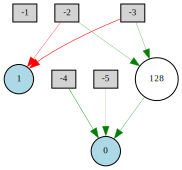

In [142]:
draw_net(config, winner, view=True)  

## Visualization of the best genome

This cell will show the best genome playing the game

In [136]:
clock = pygame.time.Clock()
pygame.font.init()
font = pygame.font.SysFont("Arial", 50)
bird = FlappyBird_GAME()

#import csv
#import numpy


while (not bird.isDead()):
   #clock.tick(60)
    net = neat.nn.FeedForwardNetwork.create(winner,config)
    nnInput = bird.calculateInput()
    output = net.activate(nnInput)
    if output[0] > output[1]:
        bird.tick(True)
 #       out = [1.0,0.0]
    else:
        bird.tick(False)
  #      out = [0.0,1.0]
    
    #w = nnInput + out
    #a = numpy.asarray(w)
   # with open(r'flapyData.csv', 'a') as f:
     #   writer = csv.writer(f)
     #   writer.writerow(a)
print(bird.TotalDistance())
        

KeyboardInterrupt: 

## DEEP LEARNING
This cell will train a MLP to play the game.

In [181]:
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

dat=pd.read_csv('flapyData.csv', sep=',',header=None)

inputs,outputs = np.column_stack((dat[0],dat[1],dat[2],dat[3],dat[4])),np.column_stack((dat[5],dat[6]))
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state=0)

mlp_classifier = MLPClassifier(hidden_layer_sizes=(10,4), max_iter=1000, tol=0.001, random_state=1, verbose=True)

mlp_classifier.fit(X_train,Y_train)



Iteration 1, loss = 2.34494169
Iteration 2, loss = 0.86819454
Iteration 3, loss = 0.34389195
Iteration 4, loss = 0.18168886
Iteration 5, loss = 0.12208448
Iteration 6, loss = 0.09701422
Iteration 7, loss = 0.08382616
Iteration 8, loss = 0.07319258
Iteration 9, loss = 0.06424246
Iteration 10, loss = 0.05851095
Iteration 11, loss = 0.05232148
Iteration 12, loss = 0.04579252
Iteration 13, loss = 0.04109867
Iteration 14, loss = 0.03649717
Iteration 15, loss = 0.03393865
Iteration 16, loss = 0.03240766
Iteration 17, loss = 0.02961006
Iteration 18, loss = 0.02762958
Iteration 19, loss = 0.02531280
Iteration 20, loss = 0.02375726
Iteration 21, loss = 0.02282959
Iteration 22, loss = 0.02146163
Iteration 23, loss = 0.02188076
Iteration 24, loss = 0.01948029
Iteration 25, loss = 0.01783538
Iteration 26, loss = 0.01670191
Iteration 27, loss = 0.01860552
Iteration 28, loss = 0.01608775
Iteration 29, loss = 0.01560375
Training loss did not improve more than tol=0.001000 for two consecutive epochs. 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 4), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=True,
       warm_start=False)

## Results

In [182]:
print("MLP predictions:\n%s\n" % (metrics.classification_report(Y_test, mlp_classifier.predict(X_test))))

MLP predictions:
             precision    recall  f1-score   support

          0       1.00      0.97      0.98       758
          1       1.00      1.00      1.00     11413

avg / total       1.00      1.00      1.00     12171




## MLP playing the game
This cell will show how the MLP plays the game 

In [179]:
#Esta celda visualiza el mejor genoma tras la neuroevolución

clock = pygame.time.Clock()
pygame.font.init()
font = pygame.font.SysFont("Arial", 50)
bird = FlappyBird_GAME()


while (not bird.isDead()):
    #clock.tick(60)
    nnInput = bird.calculateInput()
    output =  mlp_classifier.predict(np.column_stack((nnInput[0],nnInput[1],nnInput[2],nnInput[3],nnInput[4])))
    if output[0][0] > output[0][1]:
        bird.tick(True)
    else:
        bird.tick(False)

print(bird.TotalDistance())        

46195


In [ ]:
80, 29, 29, 29, 29, 136, 314, 435, 323, 2397, 4065, 1525, 3006, 3128, inf